<a href="https://colab.research.google.com/github/YasinnSoylu/5-indicator-based-trading-bots/blob/main/5_%C4%B0ND%C4%B0KAT%C3%96R_TRAD%C4%B0NG_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install ta
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("tableau-colorblind10")




In [ ]:
ticker = "AAPL"
data = yf.download(ticker, start="2022-10-01", end="2023-04-15",interval="1H")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-03 09:30:00,138.210007,141.059998,137.684998,140.899994,140.899994,30857431
2022-10-03 10:30:00,140.910004,141.585007,140.770004,140.822205,140.822205,14648705
2022-10-03 11:30:00,140.822296,141.259995,140.080002,140.919998,140.919998,10113895
2022-10-03 12:30:00,140.910004,142.179993,140.815002,142.000000,142.000000,11395010
2022-10-03 13:30:00,142.000000,142.970001,141.880005,142.884995,142.884995,9769829


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-14 11:30:00,165.029999,165.104996,164.320007,164.429993,164.429993,3895128
2023-04-14 12:30:00,164.419998,164.600006,163.820007,164.285004,164.285004,4287182
2023-04-14 13:30:00,164.285004,164.990005,164.000000,164.960007,164.960007,4127390
2023-04-14 14:30:00,164.964996,165.570007,164.399994,164.934998,164.934998,5419636
2023-04-14 15:30:00,164.940002,165.279999,164.830002,165.229996,165.229996,4814166


# BollingerBands

In [ ]:
def BollingerBands(data, period=30, std_multiplier=2):
    bb = pd.DataFrame()
    bb['middle'] = data['Close'].rolling(window=period).mean()
    bb['upper'] = bb['middle'] + (std_multiplier * data['Close'].rolling(window=period).std())
    bb['lower'] = bb['middle'] - (std_multiplier * data['Close'].rolling(window=period).std())
    return bb

def trading_strategy(data, starting_balance=1000):
    bb = BollingerBands(data)
    buy_signals = []
    sell_signals = []
    balance = starting_balance
    position = 0
    
    results = {
        'balance': [starting_balance],
        'returns': [0]
    }
    
    for i in range(len(data)):
        if data['Close'][i] <= bb['lower'][i] and position == 0:
            buy_signals.append(i)
            position = balance / data['Close'][i]
            balance = 0
        elif data['Close'][i] >= bb['upper'][i] and position > 0:
            sell_signals.append(i)
            balance = position * data['Close'][i]
            position = 0
        
        results['balance'].append(balance)
        returns = (balance - starting_balance) / starting_balance
        results['returns'].append(returns)
    
    if position > 0:
        balance = position * data['Close'][i]
    
    results['balance'].append(balance)
    results['returns'].append((balance - starting_balance) / starting_balance)
    
    fig, ax = plt.subplots(figsize=(30,6))
    ax.plot(data['Close'], label='AAPL')
    ax.plot(bb['upper'], label='BB Upper')
    ax.plot(bb['lower'], label='BB Lower')
    ax.plot(data.iloc[buy_signals]['Close'], '^', markersize=15, color='green', label='Buy')
    ax.plot(data.iloc[sell_signals]['Close'], 'v', markersize=15, color='red', label='Sell')
    ax.legend(loc="upper left", markerscale=0.7, scatterpoints=1, fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('AAPL Bollinger Bands')
    
    return results


Total percent change of Close variable of stock: 17.27%
Starting balance: $1000.00
Final balance: $1127.21
Total returns: 12.72%


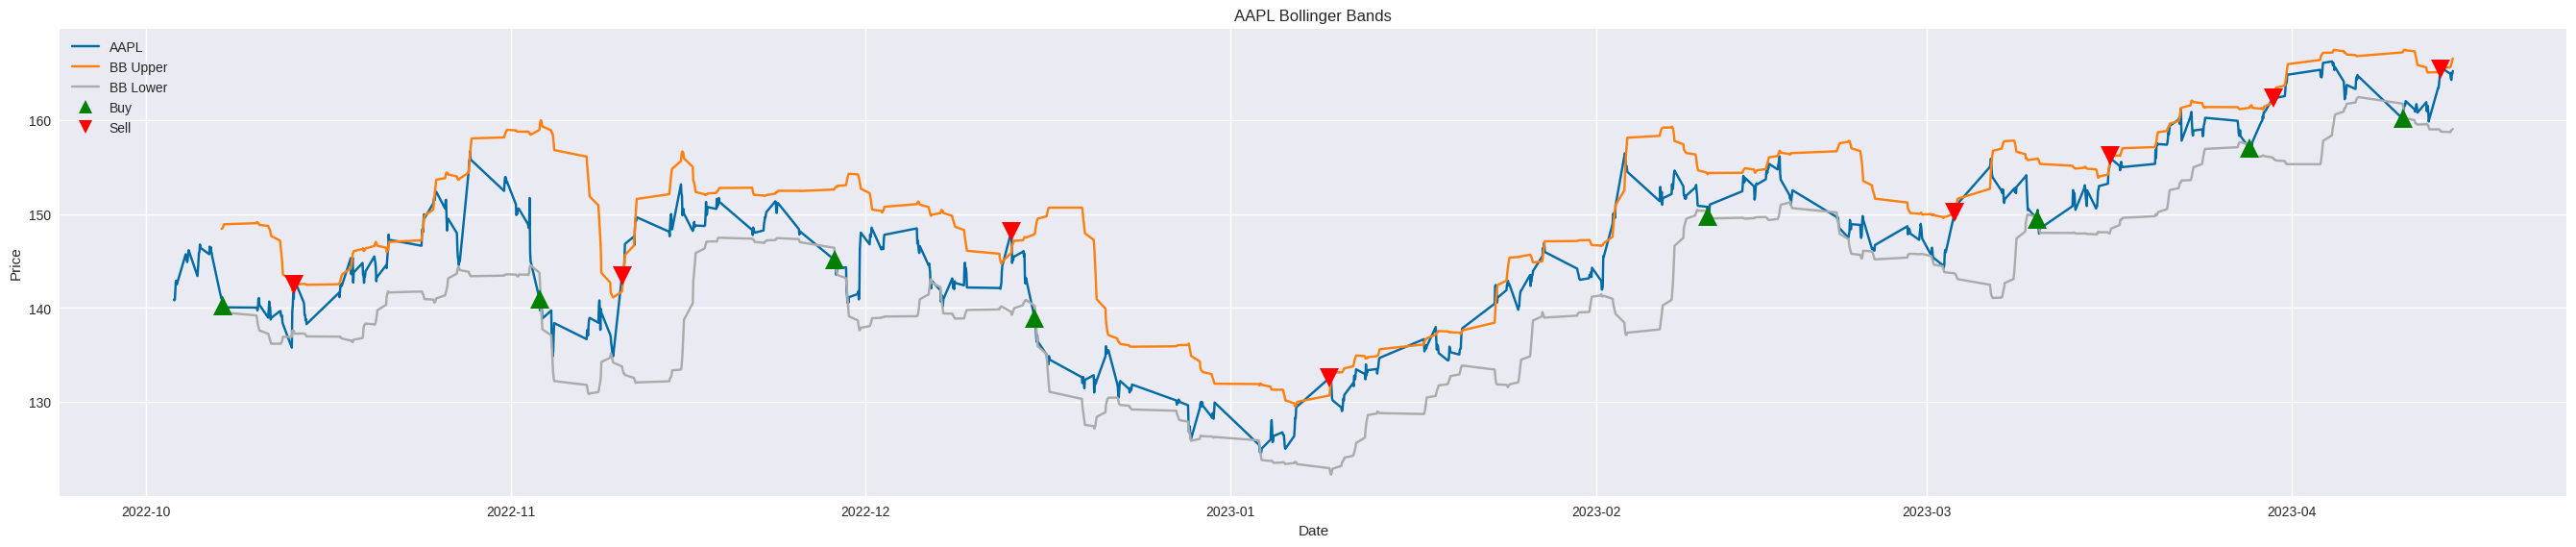

In [ ]:
results = trading_strategy(data)



percent_change = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
print("Total percent change of Close variable of stock: {:.2f}%".format(percent_change))
print(f"Starting balance: ${results['balance'][0]:.2f}")
print(f"Final balance: ${results['balance'][-1]:.2f}")
print(f"Total returns: {results['returns'][-1]*100:.2f}%")


# stochasticOscillator

In [ ]:
def StochasticOscillator(data, period=14, smoothing=3):
    so = pd.DataFrame()
    so['k'] = (data['Close'] - data['Low'].rolling(window=period).min()) / (data['High'].rolling(window=period).max() - data['Low'].rolling(window=period).min()) * 100
    so['d'] = so['k'].rolling(window=smoothing).mean()
    return so

def trading_strategy(data, starting_balance=1000):
    so = StochasticOscillator(data)
    buy_signals = []
    sell_signals = []
    balance = starting_balance
    position = 0
    
    results = {
        'balance': [starting_balance],
        'returns': [0]
    }
    
    for i in range(len(data)):
        if so['k'][i] < 20 and position == 0:

            buy_signals.append(i)
            position = balance / data['Close'][i]
            balance = 0
        elif so['k'][i] > 80 and position > 0:
            sell_signals.append(i)
            balance = position * data['Close'][i]
            position = 0
        
        results['balance'].append(balance)
        returns = (balance - starting_balance) / starting_balance
        results['returns'].append(returns)
    
    if position > 0:
        balance = position * data['Close'][i]
    
    results['balance'].append(balance)
    results['returns'].append((balance - starting_balance) / starting_balance)
    
    fig, ax = plt.subplots(figsize=(30,6))
    ax.plot(data['Close'], label='AAPL')

    ax.plot(data.iloc[buy_signals]['Close'], '^', markersize=10, color='green', label='Buy')
    ax.plot(data.iloc[sell_signals]['Close'], 'v', markersize=10, color='red', label='Sell')
    ax.legend(loc="upper left", markerscale=0.7, scatterpoints=1, fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')


    ax.set_title('AAPL Stochastic Oscillator')
    
    return results

Total percent change of Close variable of stock: 17.27%
Starting balance: $1000.00
Final balance: $1142.58
Total returns: 14.26%


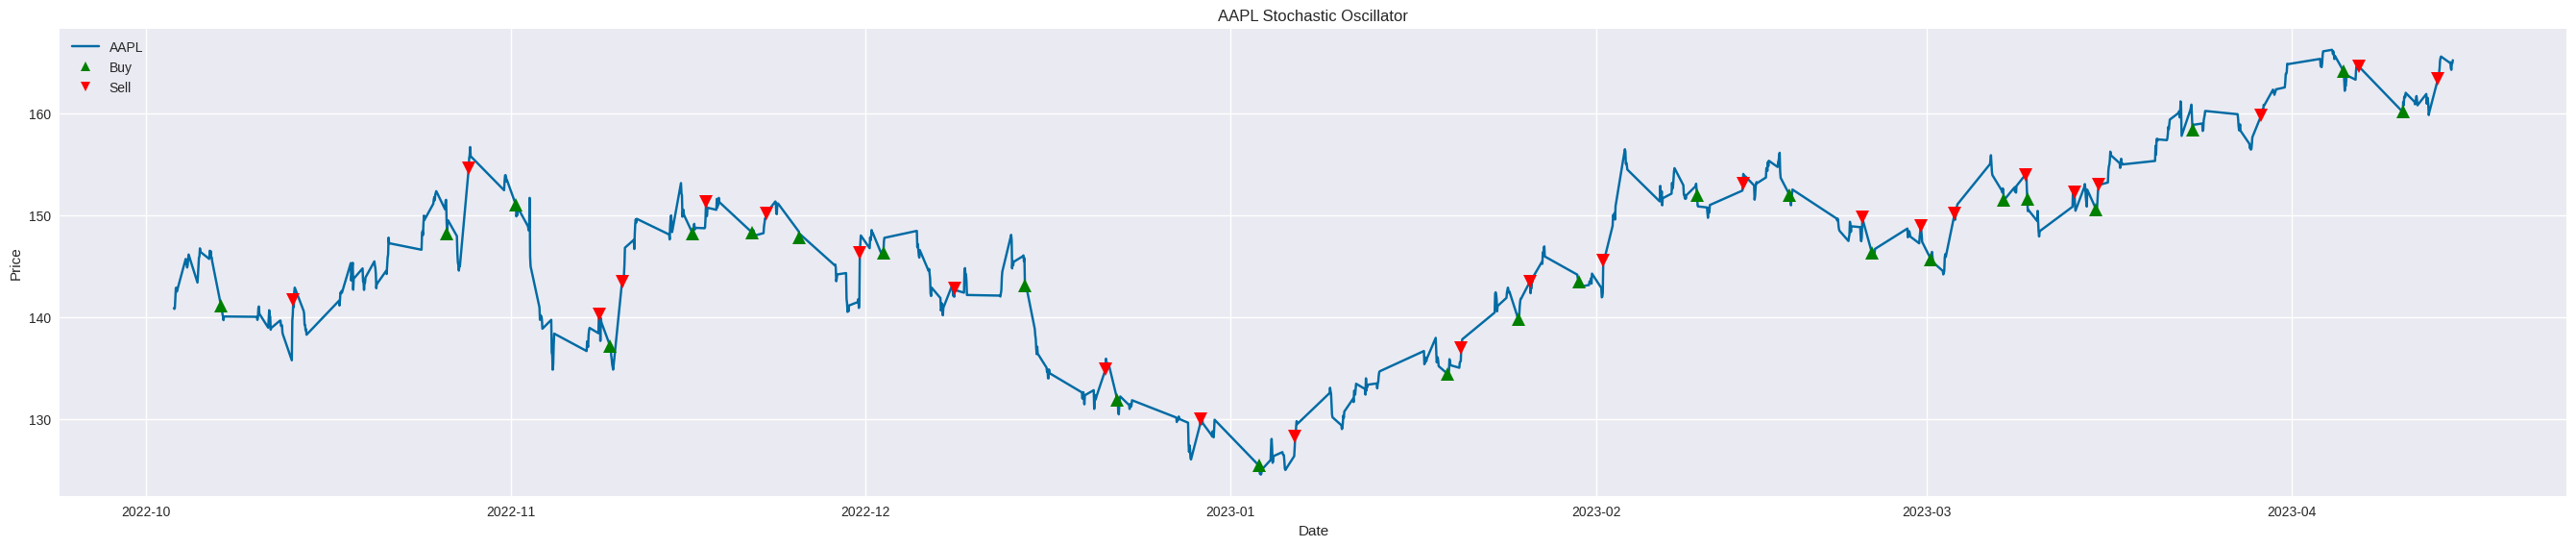

In [ ]:
results = trading_strategy(data)
percent_change = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
print("Total percent change of Close variable of stock: {:.2f}%".format(percent_change))
print(f"Starting balance: ${results['balance'][0]:.2f}")
print(f"Final balance: ${results['balance'][-1]:.2f}")
print(f"Total returns: {results['returns'][-1]*100:.2f}%")

# RSI

Total percent change of Close variable of stock: 17.27%
Starting balance: $1000.00
Final balance: $1078.74
Total returns: 7.87%


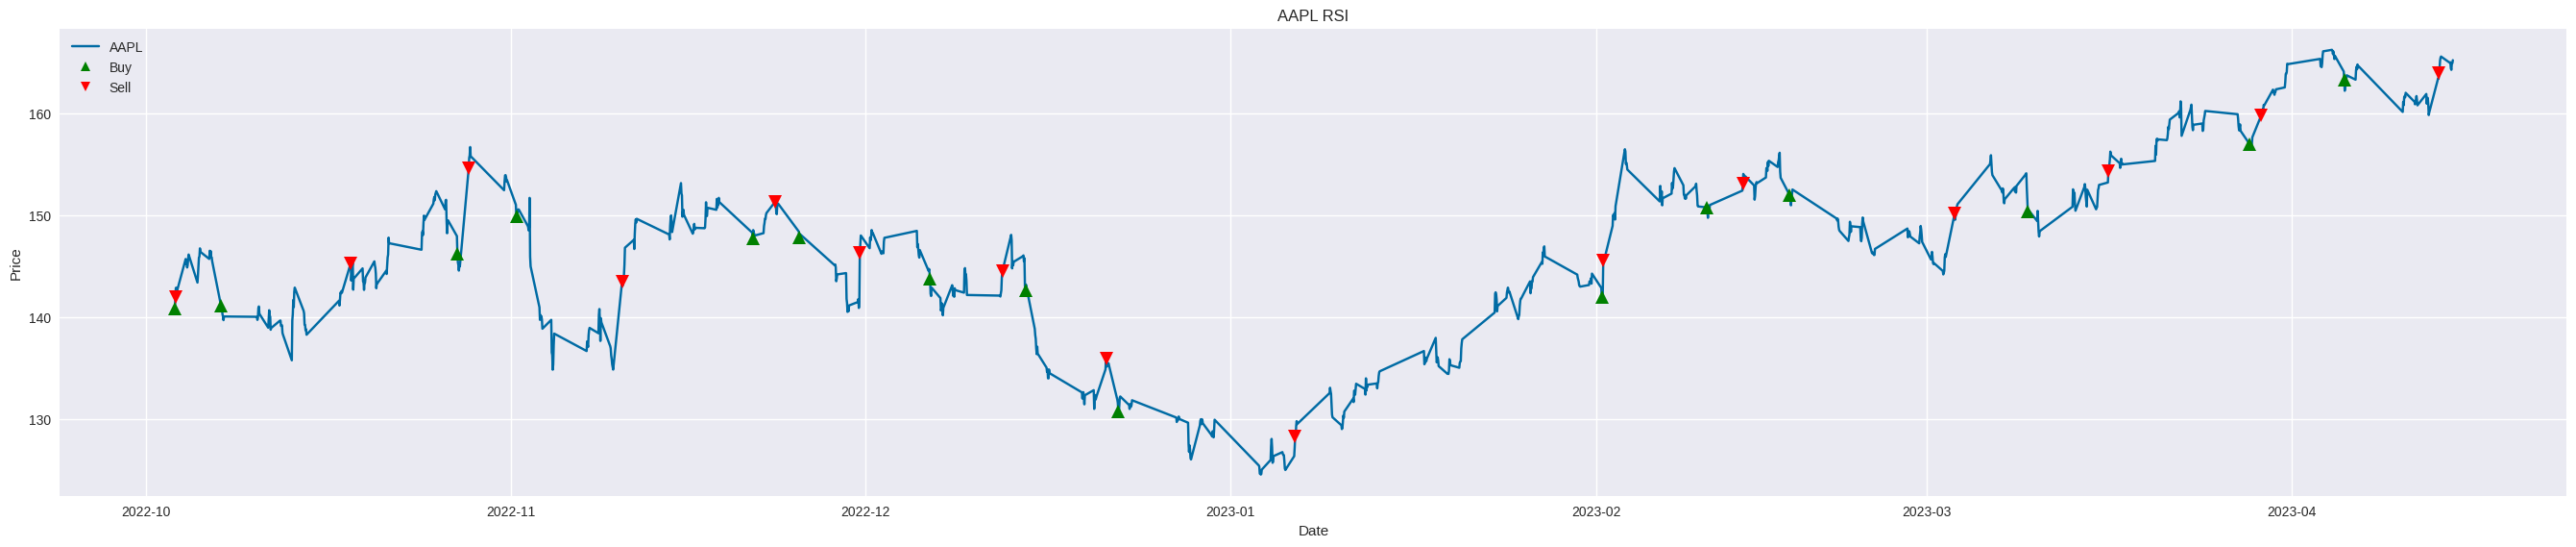

In [ ]:
def RSI(data, period=7):
    delta = data['Close'].diff()
    up = delta.clip(lower=0)
    down = -1*delta.clip(upper=0)
    ema_up = up.ewm(com=period-1, adjust=True).mean()
    ema_down = down.ewm(com=period-1, adjust=True).mean()
    rs = ema_up / ema_down
    return 100 - (100 / (1 + rs))

def trading_strategy(data, starting_balance=1000):
    rsi = RSI(data)
    buy_signals = []
    sell_signals = []
    balance = starting_balance
    position = 0
    
    results = {
        'balance': [starting_balance],
        'returns': [0]
    }
    
    for i in range(len(data)):
        if rsi[i] < 30 and position == 0:
            buy_signals.append(i)
            position = balance / data['Close'][i]
            balance = 0
        elif rsi[i] > 70 and position > 0:
            sell_signals.append(i)
            balance = position * data['Close'][i]
            position = 0
        
        results['balance'].append(balance)
        returns = (balance - starting_balance) / starting_balance
        results['returns'].append(returns)
    
    if position > 0:
        balance = position * data['Close'][i]
    
    results['balance'].append(balance)
    results['returns'].append((balance - starting_balance) / starting_balance)
    
    fig, ax = plt.subplots(figsize=(30,6))
    ax.plot(data['Close'], label='AAPL')

    ax.plot(data.iloc[buy_signals]['Close'], '^', markersize=10, color='green', label='Buy')
    ax.plot(data.iloc[sell_signals]['Close'], 'v', markersize=10, color='red', label='Sell')
    ax.legend(loc="upper left", markerscale=0.7, scatterpoints=1, fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('AAPL RSI')
    
    return results


results = trading_strategy(data)
percent_change = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
print("Total percent change of Close variable of stock: {:.2f}%".format(percent_change))
print(f"Starting balance: ${results['balance'][0]:.2f}")
print(f"Final balance: ${results['balance'][-1]:.2f}")
print(f"Total returns: {results['returns'][-1]*100:.2f}%")


# MovingAverages

Total percent change of Close variable of stock: 17.27%
Starting balance: $1000.00
Final balance: $1197.44
Total returns: 19.74%


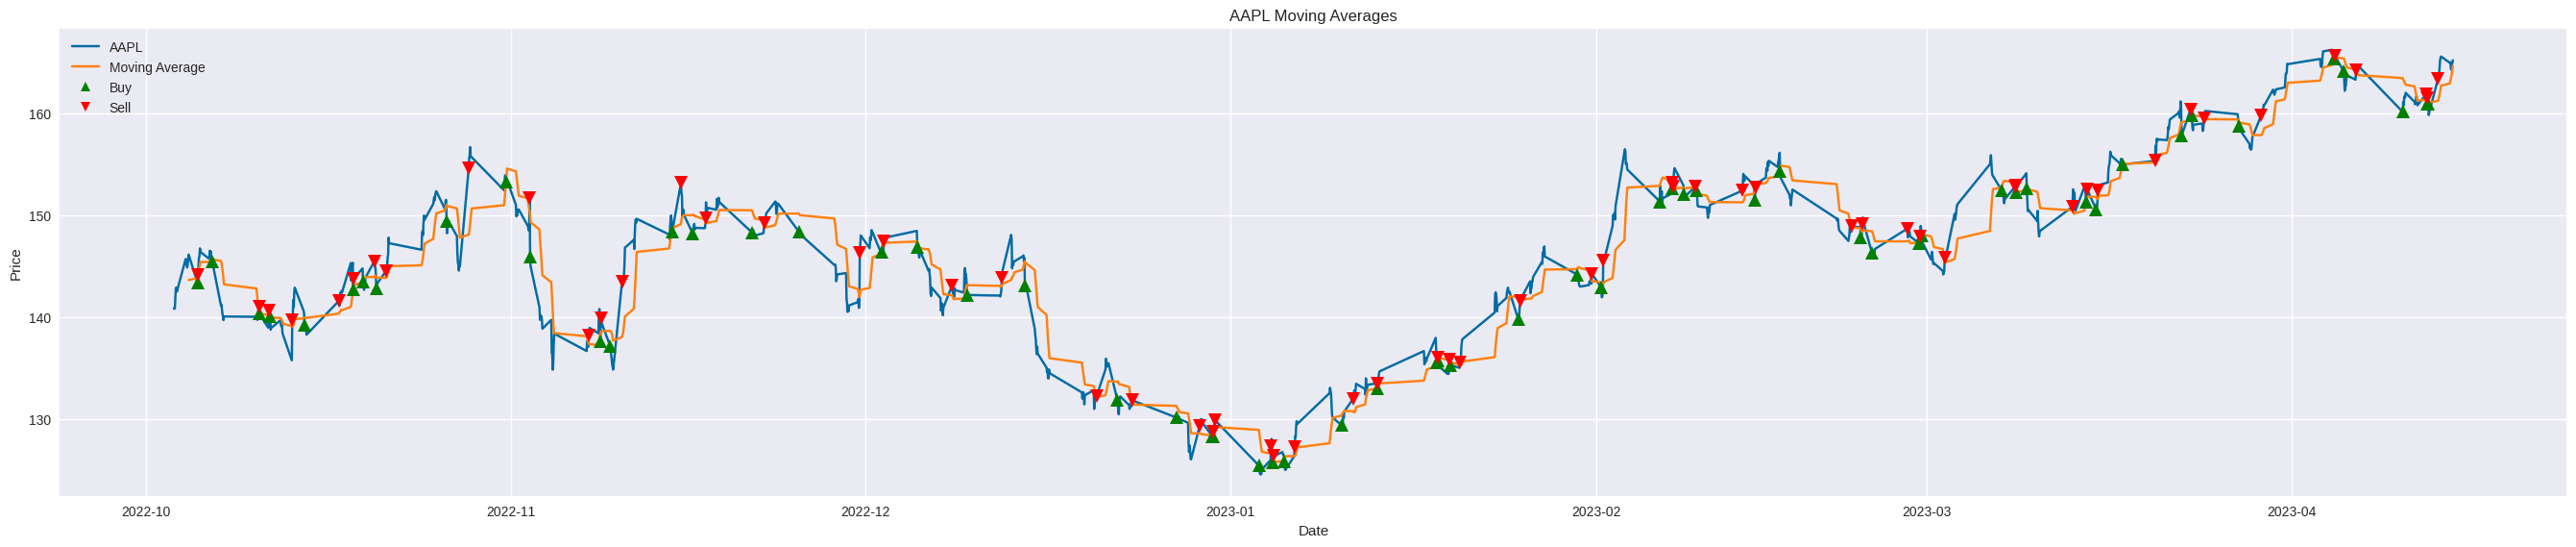

In [ ]:
def MovingAverages(data, period=14):
    ma = data['Close'].rolling(window=period).mean()
    return ma

def trading_strategy(data, starting_balance=1000):
    ma = MovingAverages(data)
    buy_signals = []
    sell_signals = []
    balance = starting_balance
    position = 0
    
    results = {
        'balance': [starting_balance],
        'returns': [0]
    }
    
    for i in range(len(data)):
        if data['Close'][i] < ma[i] and position == 0:
            buy_signals.append(i)
            position = balance / data['Close'][i]
            balance = 0
        elif data['Close'][i] > ma[i] and position > 0:
            sell_signals.append(i)
            balance = position * data['Close'][i]
            position = 0
        
        results['balance'].append(balance)
        returns = (balance - starting_balance) / starting_balance
        results['returns'].append(returns)
    
    if position > 0:
        balance = position * data['Close'][i]
    
    results['balance'].append(balance)
    results['returns'].append((balance - starting_balance) / starting_balance)
    
    fig, ax = plt.subplots(figsize=(30,6))
    ax.plot(data['Close'], label='AAPL')
    ax.plot(ma, label='Moving Average')

    ax.plot(data.iloc[buy_signals]['Close'], '^', markersize=10, color='green', label='Buy')
    ax.plot(data.iloc[sell_signals]['Close'], 'v', markersize=10, color='red', label='Sell')
    ax.legend(loc="upper left", markerscale=0.7, scatterpoints=1, fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')


    ax.set_title('AAPL Moving Averages')
    
    return results

results = trading_strategy(data)
percent_change = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
print("Total percent change of Close variable of stock: {:.2f}%".format(percent_change))
print(f"Starting balance: ${results['balance'][0]:.2f}")
print(f"Final balance: ${results['balance'][-1]:.2f}")
print(f"Total returns: {results['returns'][-1]*100:.2f}%")


Total percent change of Close variable of stock: 17.27%
Starting balance: $1000.00
Final balance: $1197.44
Total returns: 19.74%


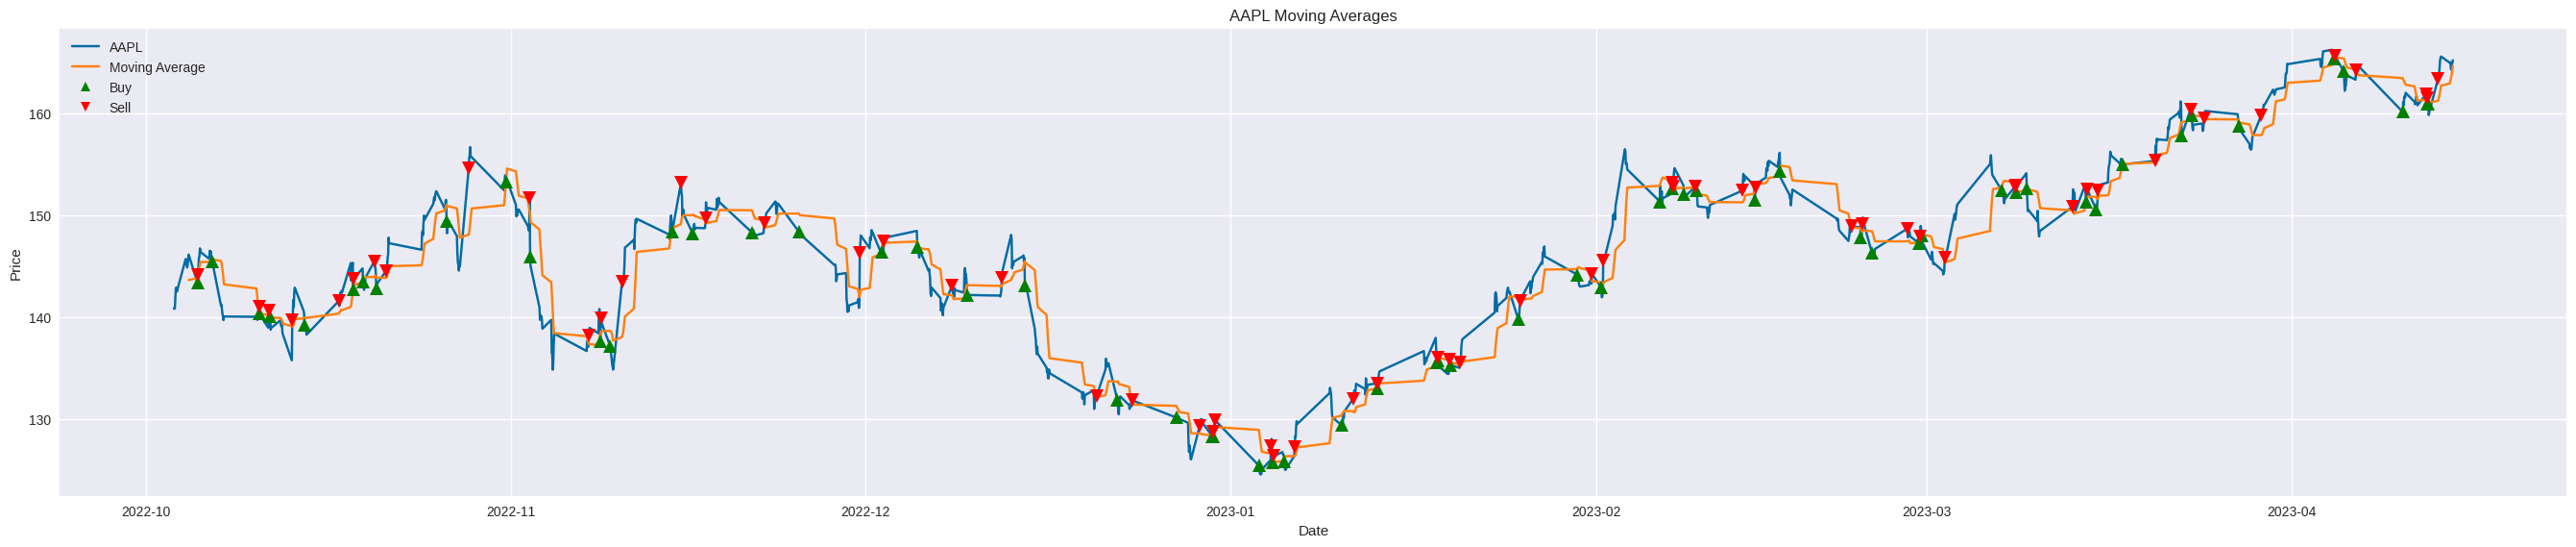

In [ ]:
results = trading_strategy(data)
percent_change = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
print("Total percent change of Close variable of stock: {:.2f}%".format(percent_change))
print(f"Starting balance: ${results['balance'][0]:.2f}")
print(f"Final balance: ${results['balance'][-1]:.2f}")
print(f"Total returns: {results['returns'][-1]*100:.2f}%")

# MACD

Total percent change of Close variable of stock: 17.27%
Starting balance: $1000.00
Final balance: $1058.36
Total returns: 5.84%


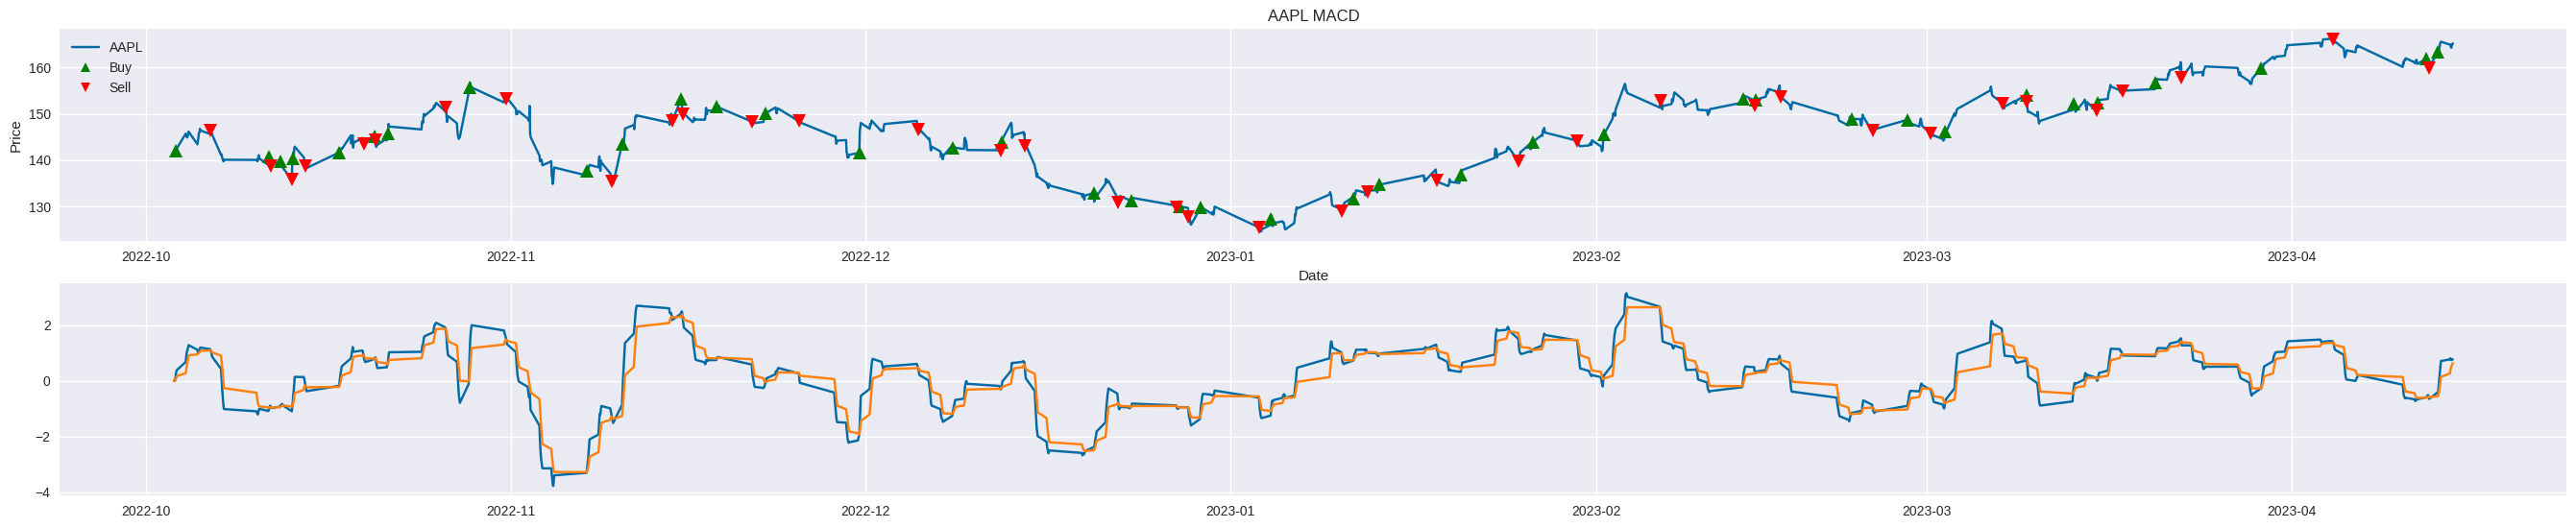

In [ ]:
def MACD(data, fast_period=12, slow_period=26, signal_period=9):
    exp1 = data['Close'].ewm(span=fast_period, adjust=False).mean()
    exp2 = data['Close'].ewm(span=slow_period, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal

def trading_strategy(data, starting_balance=1000):
    macd, signal = MACD(data)
    buy_signals = []
    sell_signals = []
    balance = starting_balance
    position = 0
    
    results = {
        'balance': [starting_balance],
        'returns': [0]
    }
    
    for i in range(len(data)):
        if macd[i] > signal[i] and position == 0:
            buy_signals.append(i)
            position = balance / data['Close'][i]
            balance = 0
        elif macd[i] < signal[i] and position > 0:
            sell_signals.append(i)
            balance = position * data['Close'][i]
            position = 0
        
        results['balance'].append(balance)
        returns = (balance - starting_balance) / starting_balance
        results['returns'].append(returns)
    
    if position > 0:
        balance = position * data['Close'][i]
    
    results['balance'].append(balance)
    results['returns'].append((balance - starting_balance) / starting_balance)
    
    fig,(ax,ax2) = plt.subplots(2,1,figsize=(30,6))

    ax.plot(data['Close'], label='AAPL')
    ax2.plot(macd, label='MACD')
    ax2.plot(signal, label='Signal')

    ax.plot(data.iloc[buy_signals]['Close'], '^', markersize=10, color='green', label='Buy')
    ax.plot(data.iloc[sell_signals]['Close'], 'v', markersize=10, color='red', label='Sell')
    ax.legend(loc="upper left", markerscale=0.7, scatterpoints=1, fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

    ax.set_title('AAPL MACD')
    
    return results

results = trading_strategy(data)
percent_change = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
print("Total percent change of Close variable of stock: {:.2f}%".format(percent_change))
print(f"Starting balance: ${results['balance'][0]:.2f}")
print(f"Final balance: ${results['balance'][-1]:.2f}")
print(f"Total returns: {results['returns'][-1]*100:.2f}%")


# ParabolicSAR

Total percent change of Close variable of stock: 17.27%
Starting balance: $1000.00
Final balance: $1045.52
Total returns: 4.55%


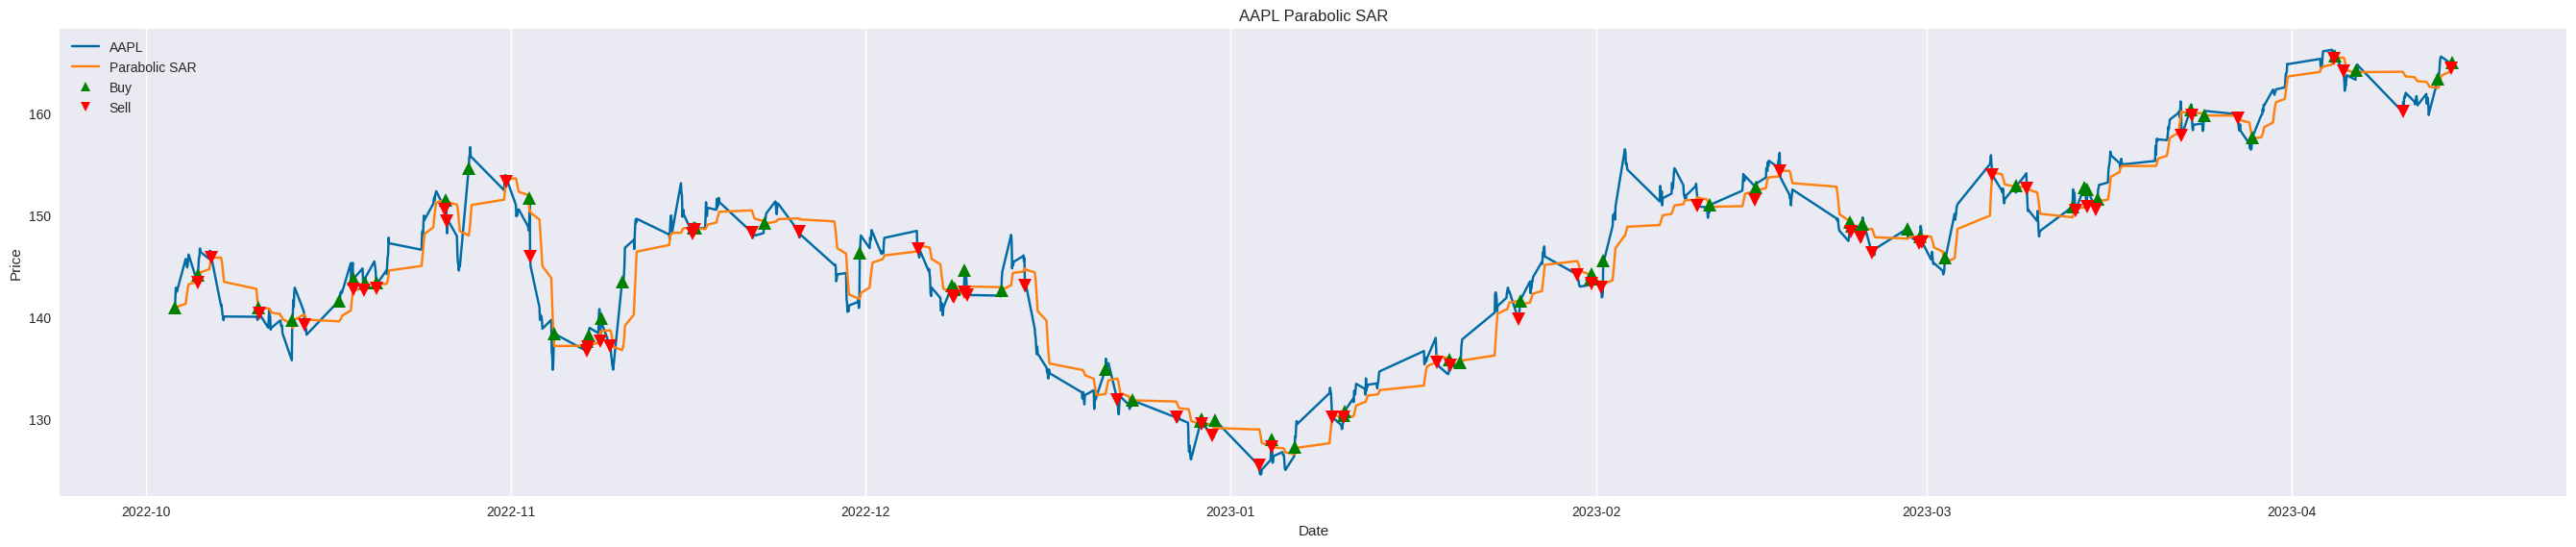

In [ ]:
def ParabolicSAR(data, af=0.02, af_max=0.2):
    high = data['High']
    low = data['Low']
    close = data['Close']
    sar = close.copy()
    trend = 1
    ep = sar[0]
    af_current = af
    af_increment = af
    for i in range(2, len(data)):
        if trend == 1:
            if low[i-1] < sar[i-1]:
                trend = -1
                sar[i] = high[i-1]
                ep = low[i-1]
                af_current = af
        else:
            if high[i-1] > sar[i-1]:
                trend = 1
                sar[i] = low[i-1]
                ep = high[i-1]
                af_current = af
        
        if trend == 1:
            if high[i] > ep:
                ep = high[i]
                af_current = min(af_current + af_increment, af_max)
            sar[i] = sar[i-1] + af_current * (ep - sar[i-1])
        else:
            if low[i] < ep:
                ep = low[i]
                af_current = min(af_current + af_increment, af_max)
            sar[i] = sar[i-1] - af_current * (sar[i-1] - ep)
        
    return sar

def trading_strategy(data, starting_balance=1000):
    sar = ParabolicSAR(data)
    buy_signals = []
    sell_signals = []
    balance = starting_balance
    position = 0
    
    results = {
        'balance': [starting_balance],
        'returns': [0]
    }
    
    for i in range(len(data)):
        if data['Close'][i] > sar[i] and position == 0:
            buy_signals.append(i)
            position = balance / data['Close'][i]
            balance = 0
        elif data['Close'][i] < sar[i] and position > 0:
            sell_signals.append(i)
            balance = position * data['Close'][i]
            position = 0
        
        results['balance'].append(balance)
        returns = (balance - starting_balance) / starting_balance
        results['returns'].append(returns)
    
    if position > 0:
        balance = position * data['Close'][i]
    
    results['balance'].append(balance)
    results['returns'].append((balance - starting_balance) / starting_balance)
    
    fig, ax = plt.subplots(figsize=(30,6))
    ax.plot(data['Close'], label='AAPL')
    ax.plot(sar, label='Parabolic SAR')

    ax.plot(data.iloc[buy_signals]['Close'], '^', markersize=10, color='green', label='Buy')
    ax.plot(data.iloc[sell_signals]['Close'], 'v', markersize=10, color='red', label='Sell')
    ax.legend(loc="upper left", markerscale=0.7, scatterpoints=1, fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.yaxis.grid()

    ax.set_title('AAPL Parabolic SAR')
    
    return results

results = trading_strategy(data)
percent_change = (data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0] * 100
print("Total percent change of Close variable of stock: {:.2f}%".format(percent_change))
print(f"Starting balance: ${results['balance'][0]:.2f}")
print(f"Final balance: ${results['balance'][-1]:.2f}")
print(f"Total returns: {results['returns'][-1]*100:.2f}%")